In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL batch_size'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

Could not fetch metrics in run: 65 UID: stat-wmm;128;False;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 66 UID: stat-wmm;128;False;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 67 UID: stat-wmm;128;False;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 68 UID: stat-wmm;128;False;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch 

In [4]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(int(df[df['UID'] == uid]['batch_size_rehearsal'].iloc[0]))

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[1]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90)
    plt.title(f"metic: {metric_name}")
    plt.xlabel("unique identifier")
    plt.ylabel("accuracy [%]")
    plt.show()

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

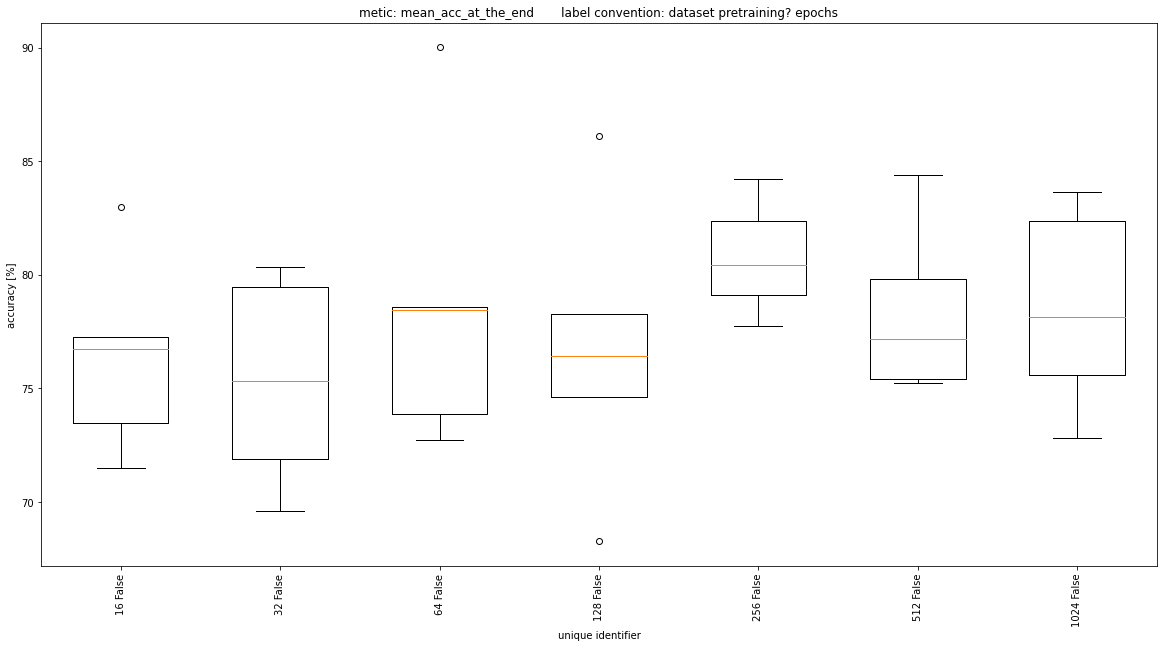

<Figure size 432x288 with 0 Axes>

In [14]:
df = viz.metrics_df.copy()

df = df[(df['pretraining'] != 'True')]

box_plot('mean_acc_at_the_end', df, filename="batch_size_median_acc_at_the_end_TRUE_pretraining")

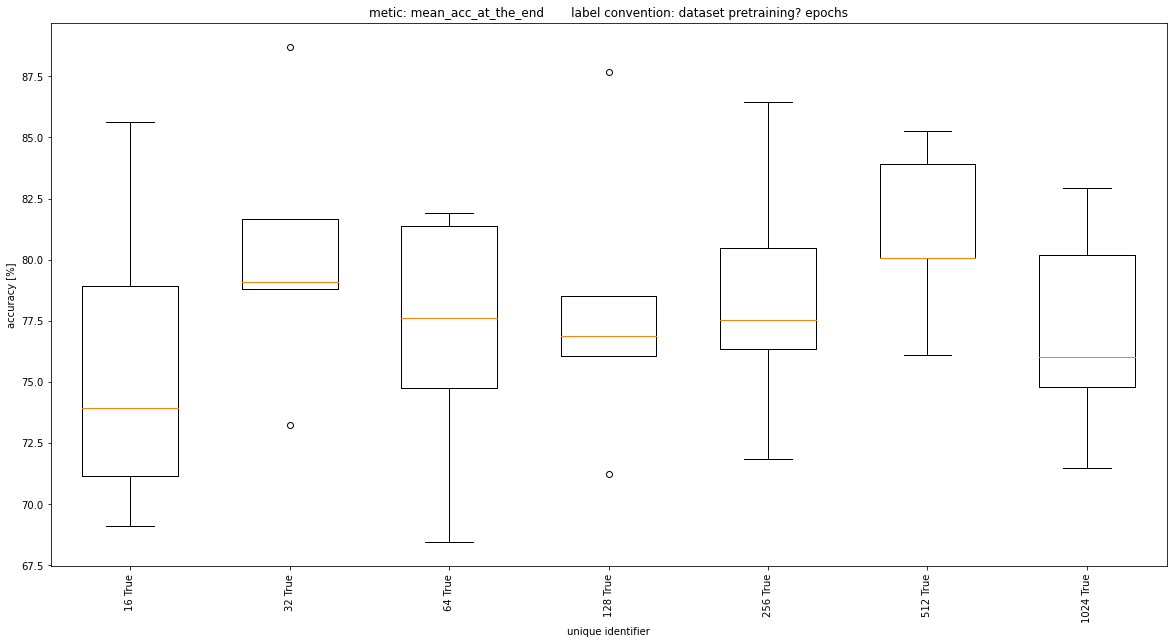

<Figure size 432x288 with 0 Axes>

In [15]:
df = viz.metrics_df.copy()

df = df[(df['pretraining'] != 'False')]

box_plot('mean_acc_at_the_end', df, filename="batch_size_median_acc_at_the_end_FALSE_pretraining")

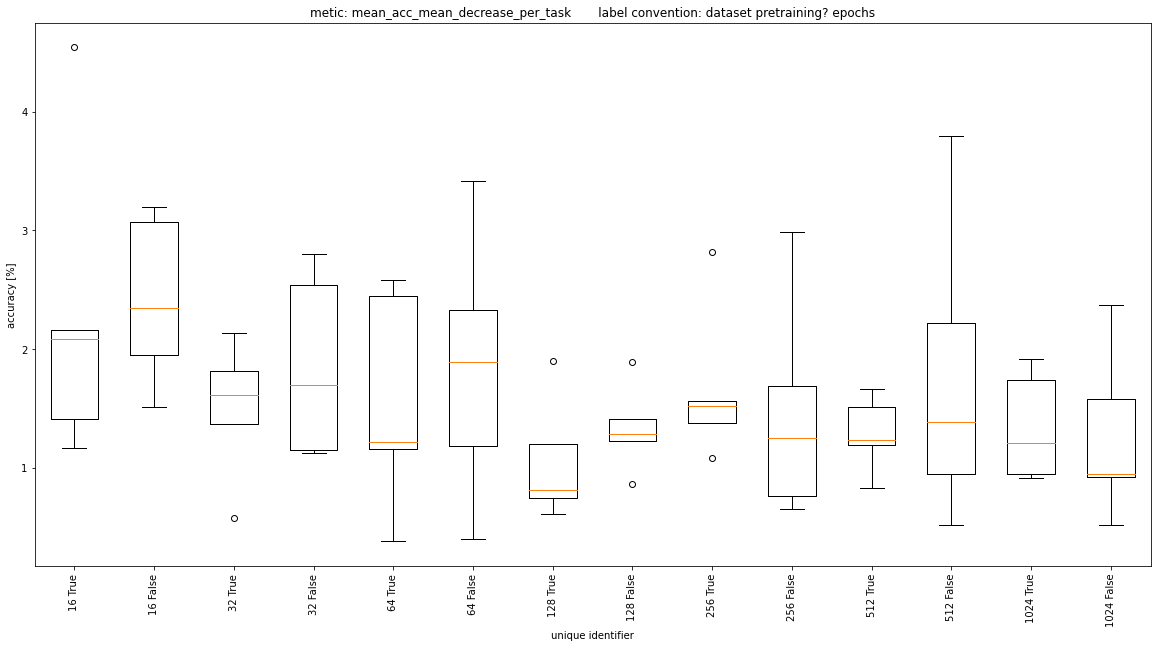

<Figure size 432x288 with 0 Axes>

In [17]:
df = viz.metrics_df.copy()

# df = df[(df['pretraining'] != 'False')]

box_plot('mean_acc_mean_decrease_per_task', df, filename="batch_size_mean_acc_mean_decrease_per_task")

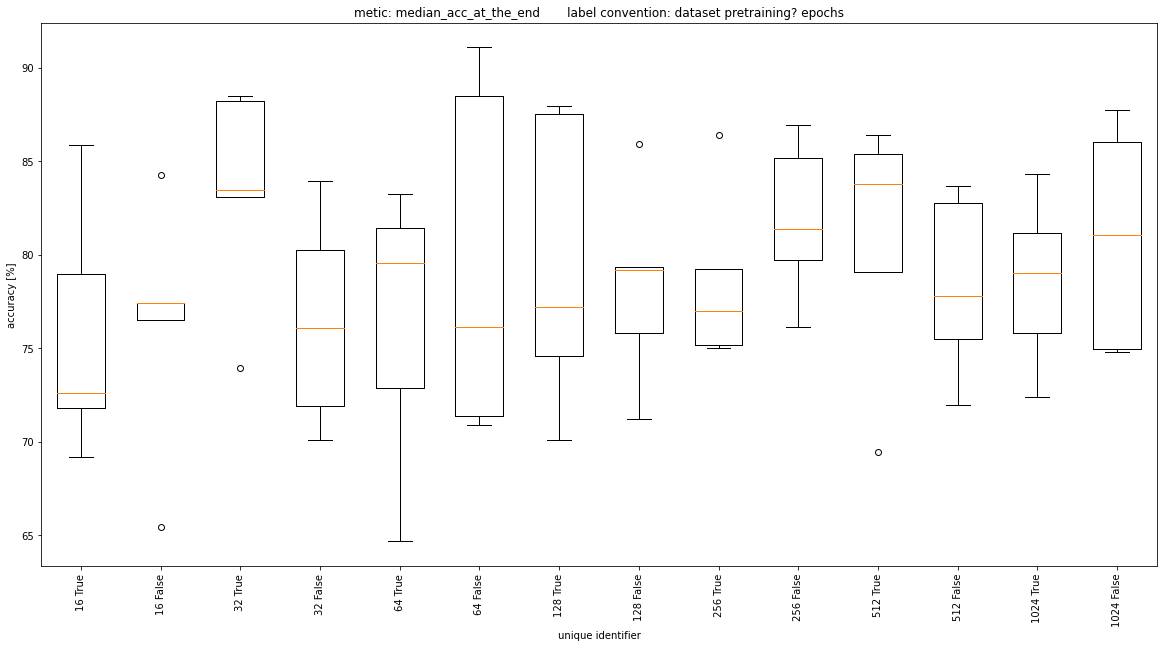

In [18]:
box_plot('median_acc_at_the_end', df)

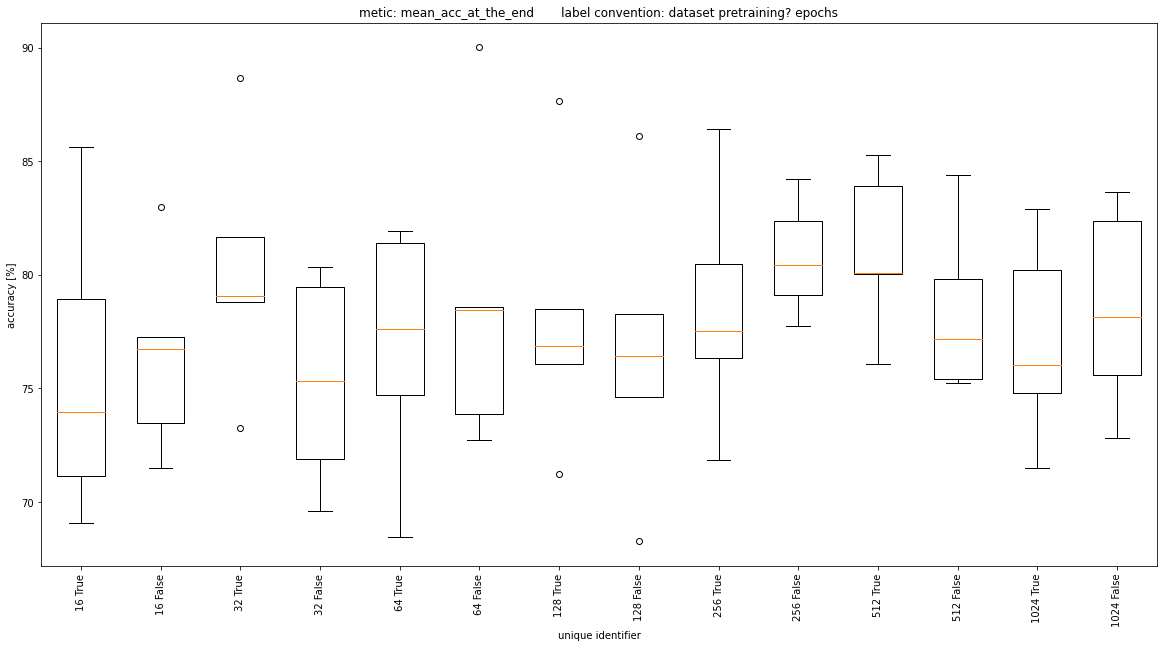

In [19]:
box_plot('mean_acc_at_the_end', df)

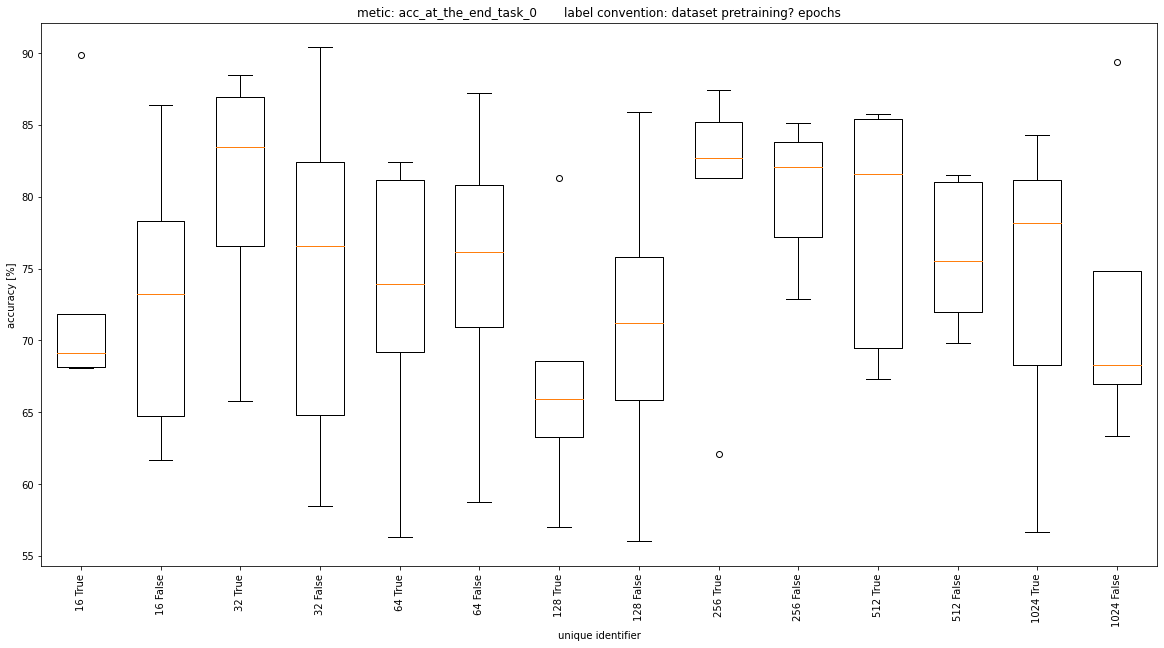

In [20]:
box_plot('acc_at_the_end_task_0', df)

In [8]:
df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,rehearsal_dataset,batch_size_rehearsal,pretraining,learning_rate,epochs,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;64;True;0.003;5;,81.150002,84.564583,2.237499,90.099998,55.000000,83.150002,78.349479,2.733332,91.349998,...,stat-wmm,64,True,0.003,5,81.916667,81.449997,33.770087,2.449167,73.900000
1,stat-wmm;64;True;0.003;5;,73.900002,71.912500,0.775000,77.000000,51.250000,87.000000,79.132292,0.516668,88.550003,...,stat-wmm,64,True,0.003,5,81.383334,83.250000,31.278750,2.583334,70.060001
2,stat-wmm;64;True;0.003;5;,56.299999,57.035833,1.950000,64.099998,50.700001,64.650002,60.532812,0.599998,66.449997,...,stat-wmm,64,True,0.003,5,68.466666,64.650002,29.113184,1.220000,65.149999
3,stat-wmm;64;True;0.003;5;,82.400002,81.297917,1.000000,86.400002,52.599998,72.849998,67.944792,1.233335,76.550003,...,stat-wmm,64,True,0.003,5,74.733332,72.849998,31.439341,1.161667,67.750001
4,stat-wmm;64;True;0.003;5;,69.199997,68.122083,1.112501,73.650002,51.549999,79.550003,73.335937,0.783333,81.900002,...,stat-wmm,64,True,0.003,5,77.633334,79.550003,31.218094,0.379167,69.030001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,stat-wmm;16;False;0.003;5;,78.300003,82.132083,2.974998,90.199997,57.099998,75.400002,73.788542,3.916667,87.150002,...,stat-wmm,16,False,0.003,5,76.733335,76.500000,33.725292,3.068333,74.530000
66,stat-wmm;16;False;0.003;5;,64.699997,66.585833,1.650002,71.300003,50.500000,65.400002,64.894792,2.716667,73.550003,...,stat-wmm,16,False,0.003,5,71.516665,65.400002,30.392577,1.513334,67.940001
67,stat-wmm;16;False;0.003;5;,73.199997,71.482917,1.725000,80.099998,52.950001,81.199997,76.395833,3.516668,91.750000,...,stat-wmm,16,False,0.003,5,77.266665,77.400002,32.634819,3.198333,73.459999
68,stat-wmm;16;False;0.003;5;,61.700001,64.289167,2.374999,71.199997,46.500000,81.400002,75.062501,0.883334,84.050003,...,stat-wmm,16,False,0.003,5,73.500001,77.400002,31.533500,2.341667,69.070000


In [9]:
df.value_counts('UID')

UID
stat-wmm;1024;False;0.003;5;    5
stat-wmm;1024;True;0.003;5;     5
stat-wmm;128;False;0.003;5;     5
stat-wmm;128;True;0.003;5;      5
stat-wmm;16;False;0.003;5;      5
stat-wmm;16;True;0.003;5;       5
stat-wmm;256;False;0.003;5;     5
stat-wmm;256;True;0.003;5;      5
stat-wmm;32;False;0.003;5;      5
stat-wmm;32;True;0.003;5;       5
stat-wmm;512;False;0.003;5;     5
stat-wmm;512;True;0.003;5;      5
stat-wmm;64;False;0.003;5;      5
stat-wmm;64;True;0.003;5;       5
dtype: int64

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           82.46 &     80.71 &               0.82 &  test \\
    1 &           80.56 &     78.49 &               0.70 &  test \\
    2 &           74.61 &     74.72 &               2.51 &  test \\
    3 &           85.49 &     84.12 &               0.78 &  test \\
    4 &           89.59 &     86.02 &               0.00 &  test \\
\bottomrule
\end{tabular}



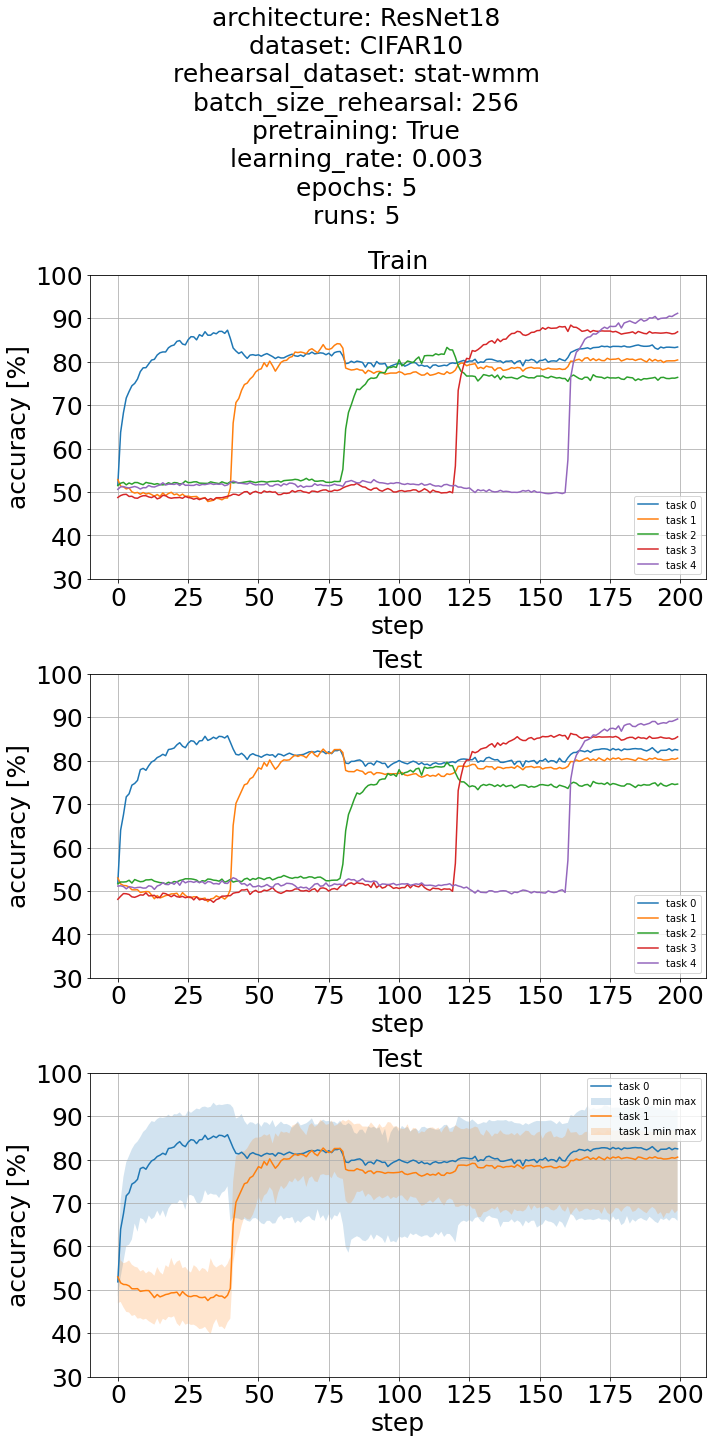

In [10]:
viz.plot_single_setting_aggregated('stat-wmm;256;True;0.003;5', fontsize=25, filename='batch_size_run_good', layout='vertical')

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           71.89 &     74.51 &               1.96 &  test \\
    1 &           73.53 &     75.65 &               2.27 &  test \\
    2 &           72.30 &     72.86 &               2.90 &  test \\
    3 &           76.59 &     75.91 &               3.35 &  test \\
    4 &           84.29 &     78.78 &               0.00 &  test \\
\bottomrule
\end{tabular}



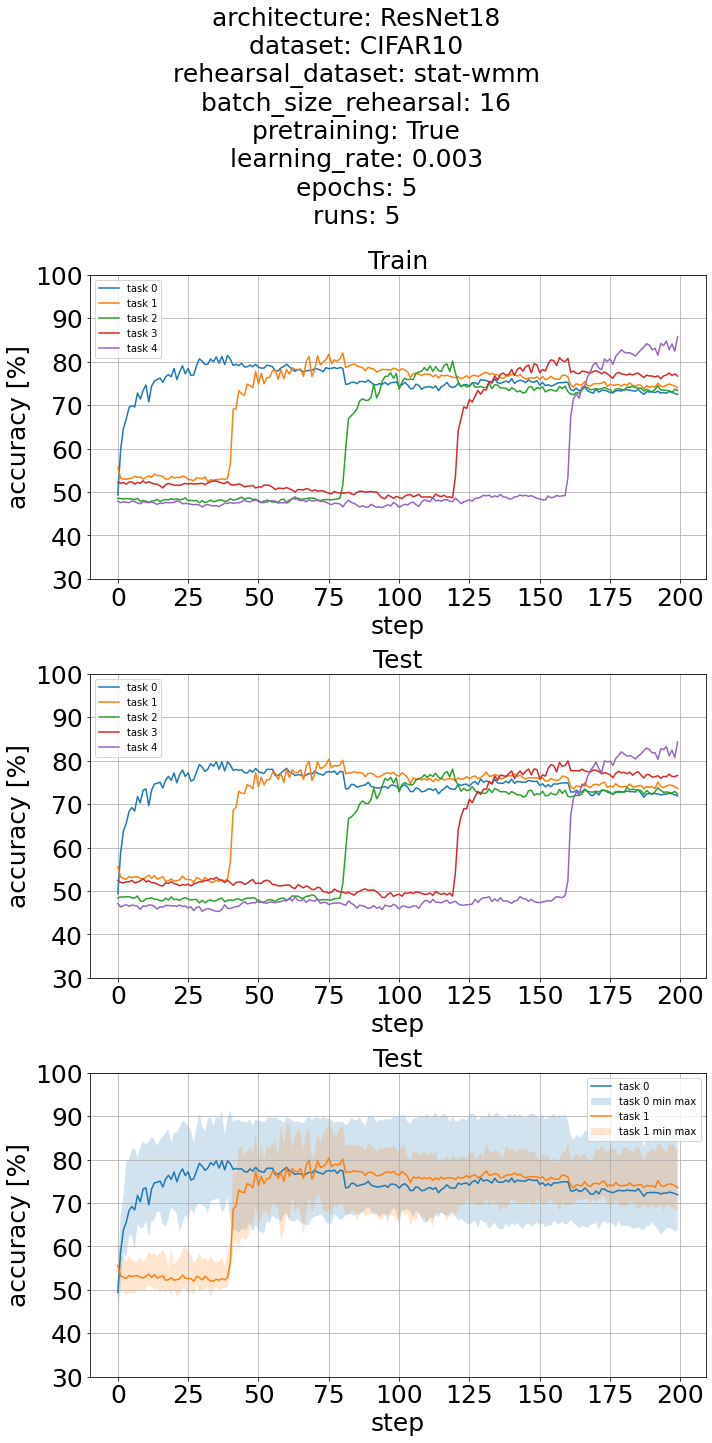

In [11]:
viz.plot_single_setting_aggregated('stat-wmm;16;True;0.003;5', fontsize=25, filename='batch_size_run_bad', layout='vertical')

# All runs

Error in run: 65 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 66 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 67 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 68 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 69 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 70 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 71 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3

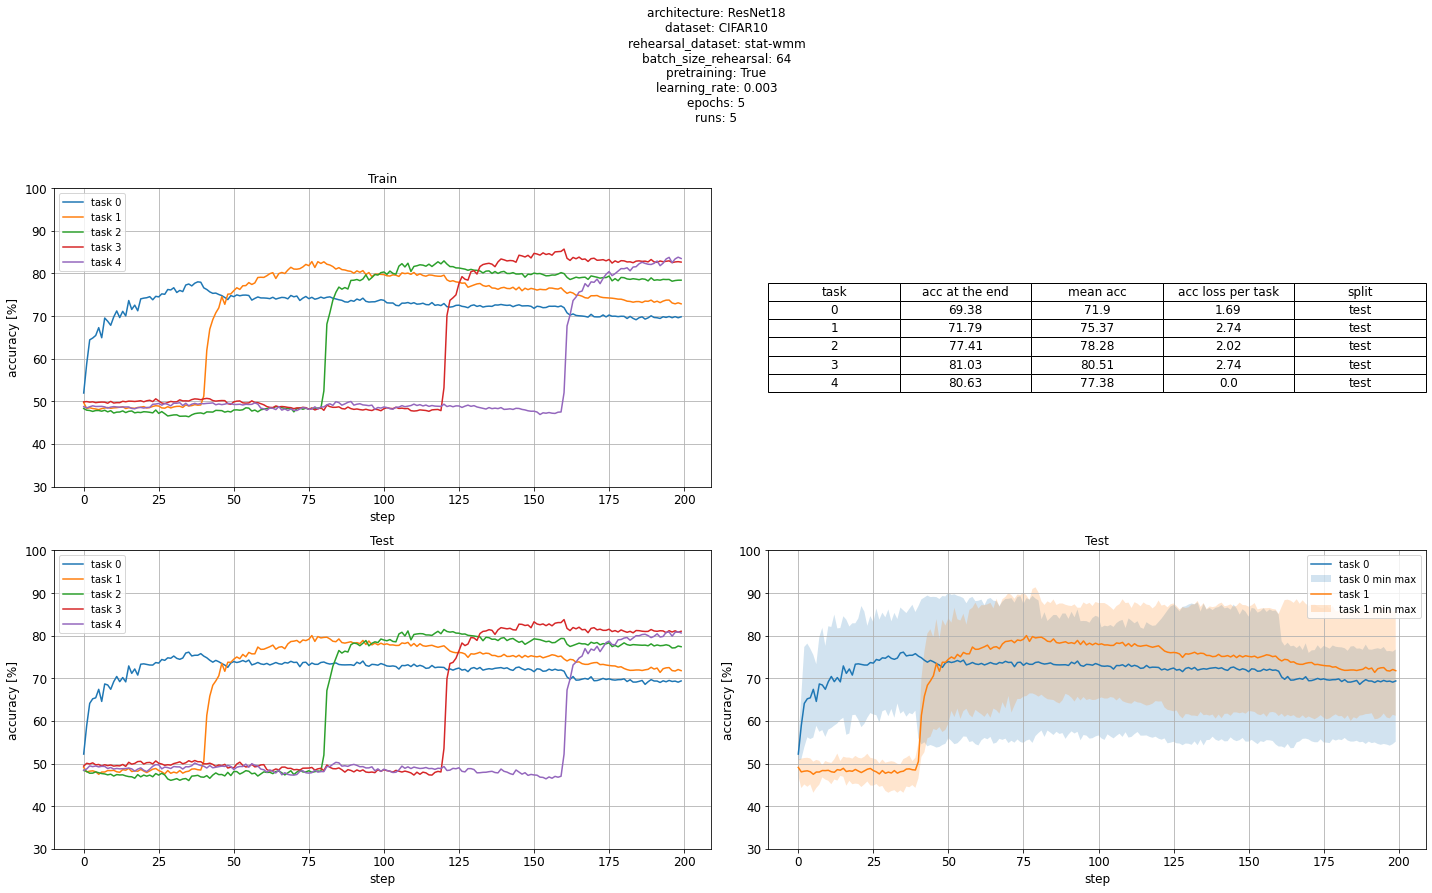

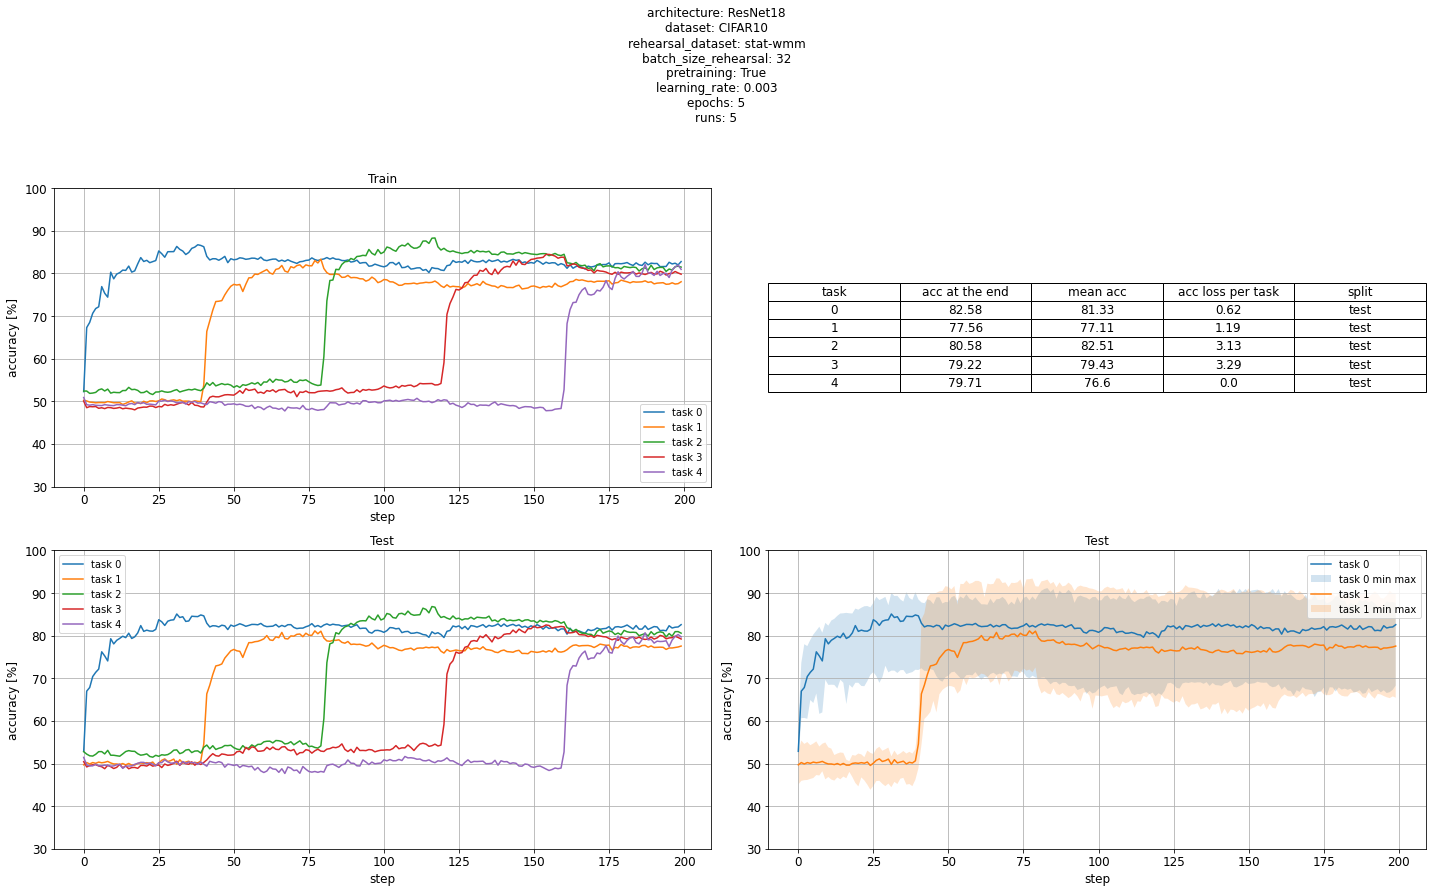

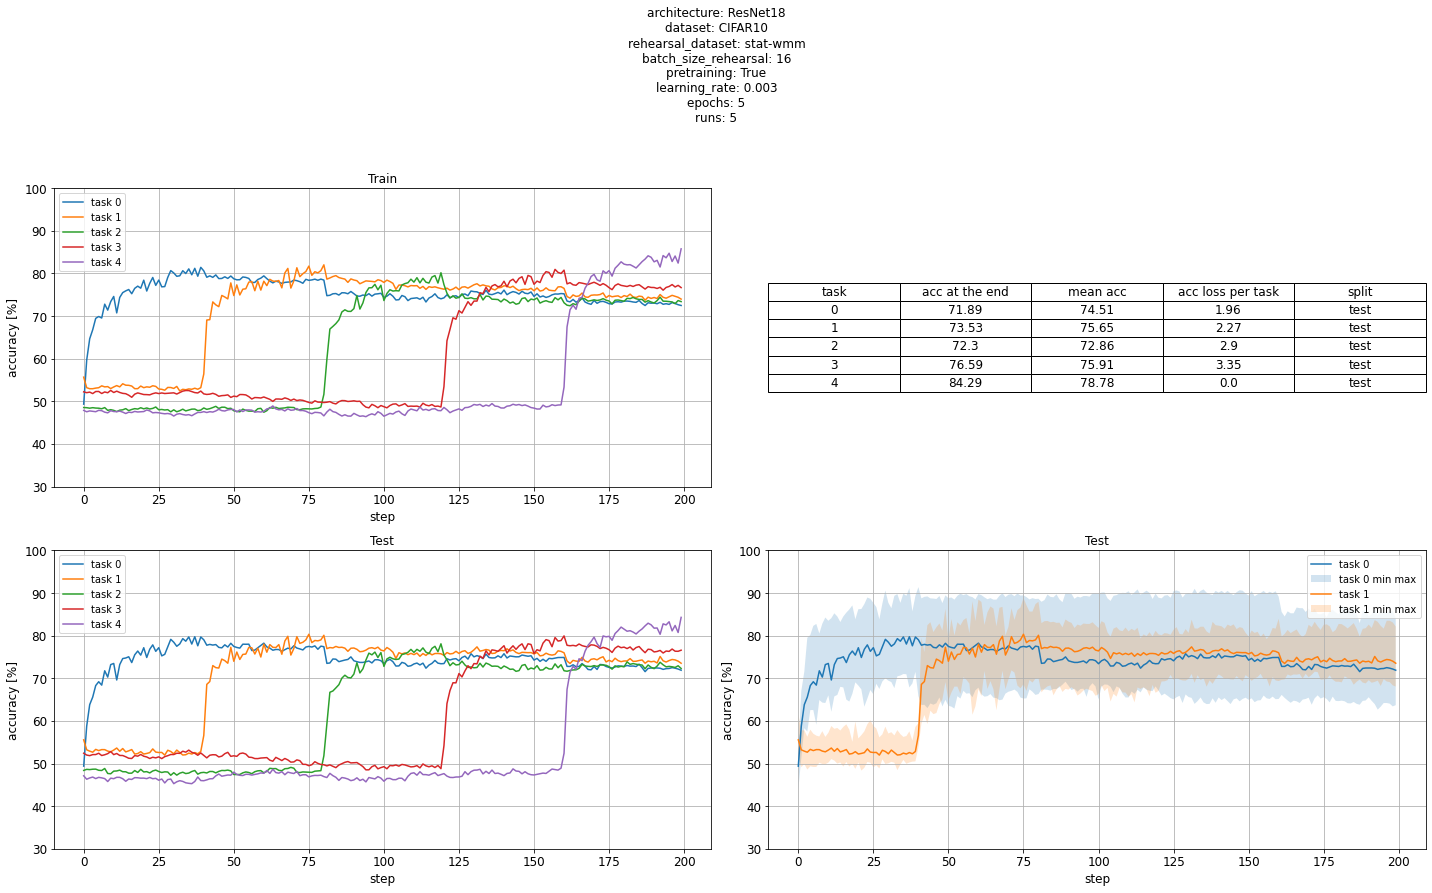

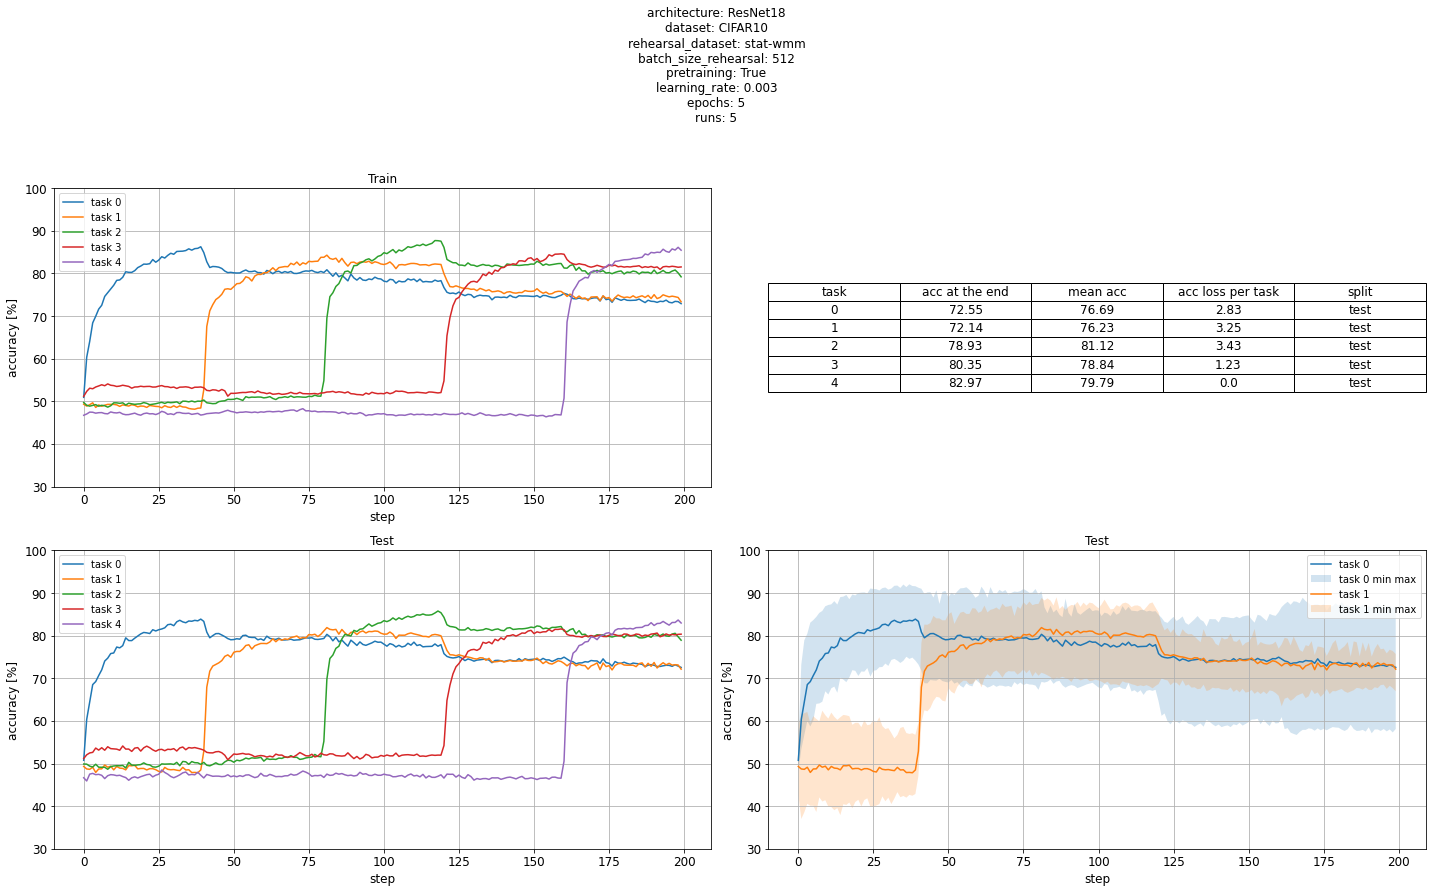

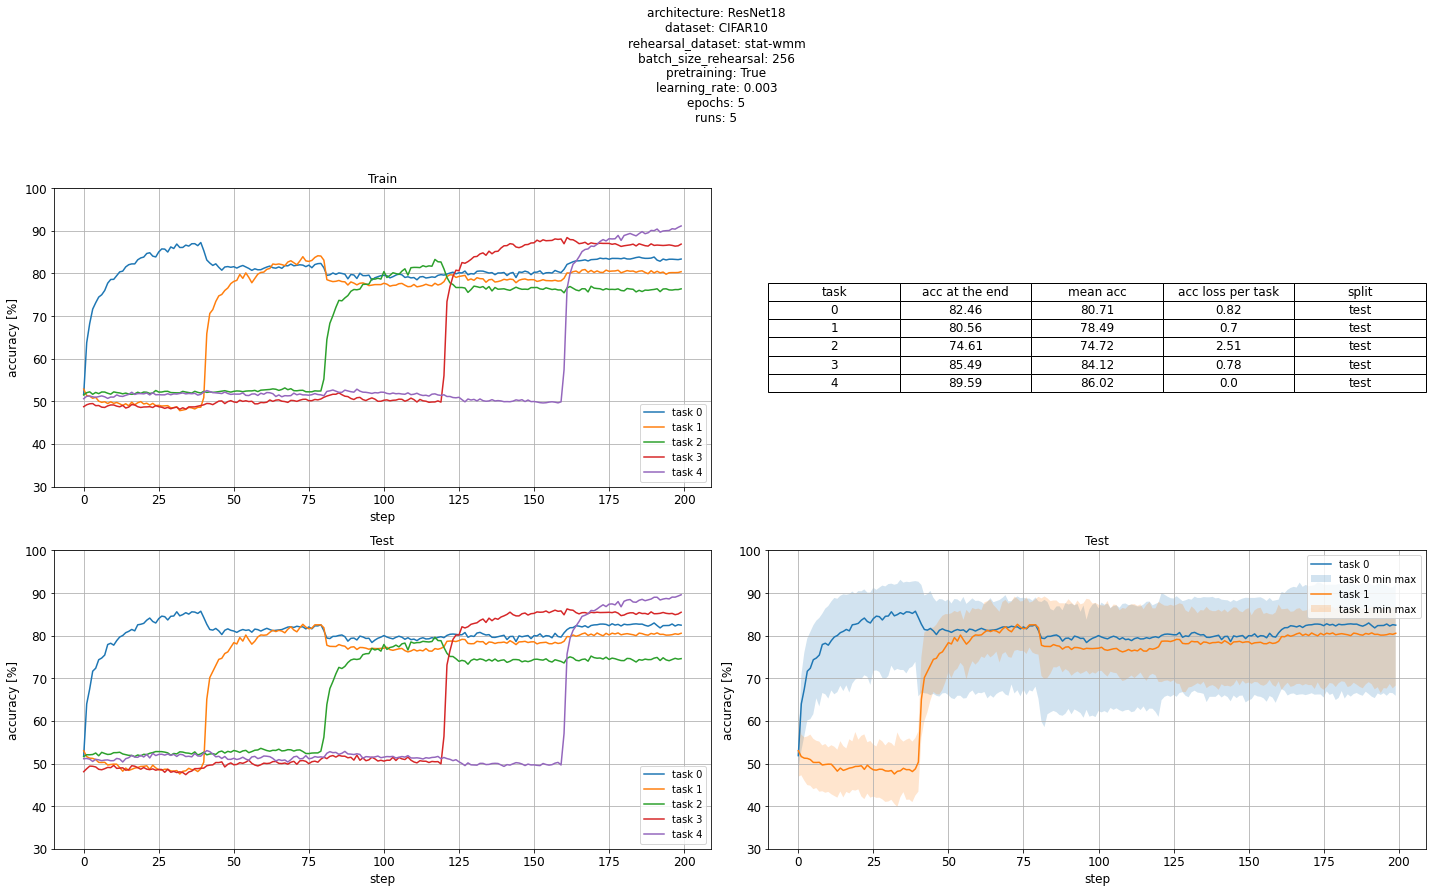

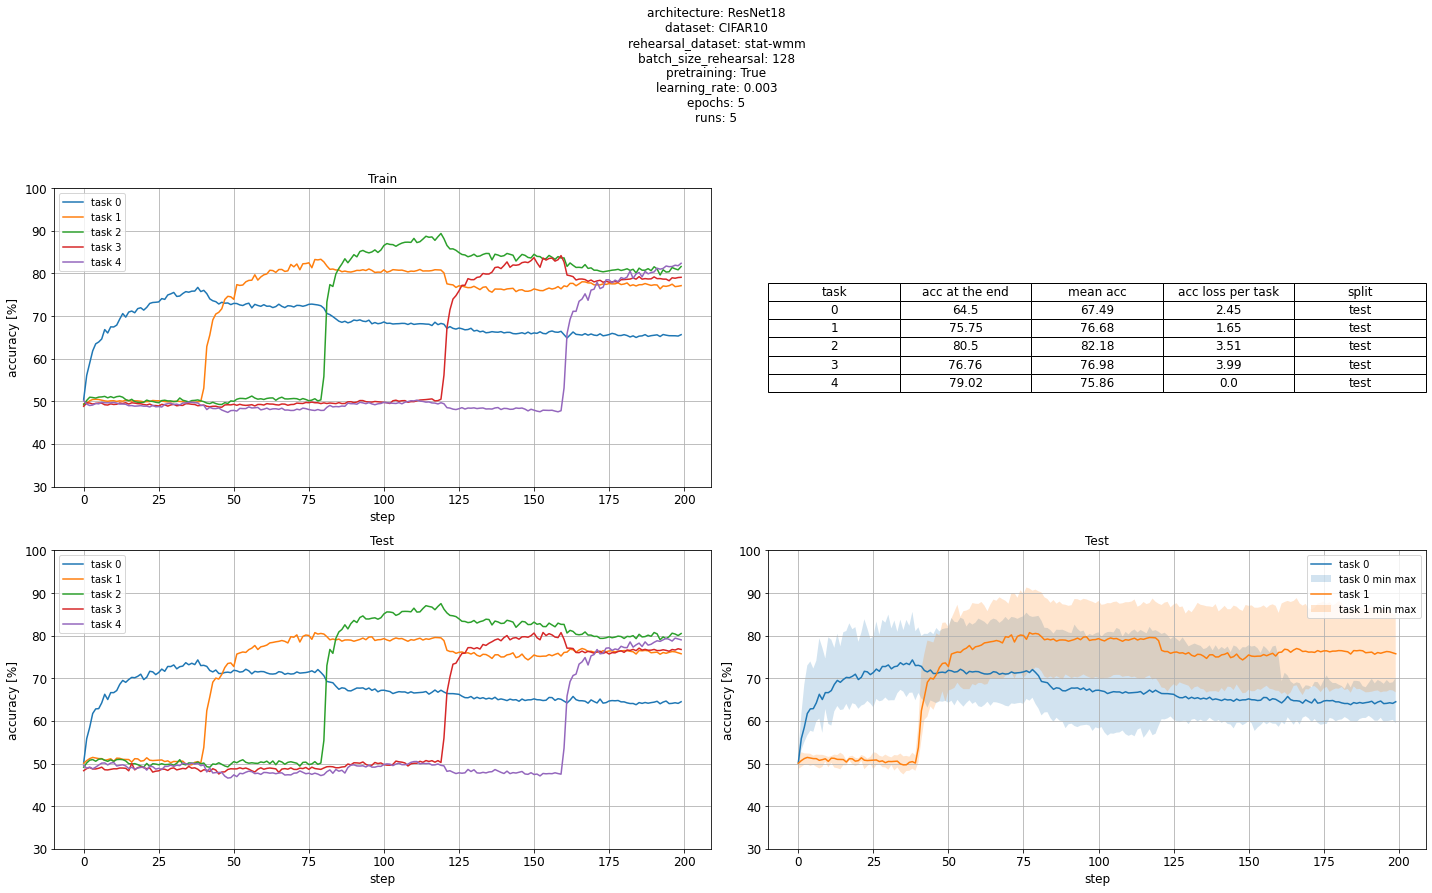

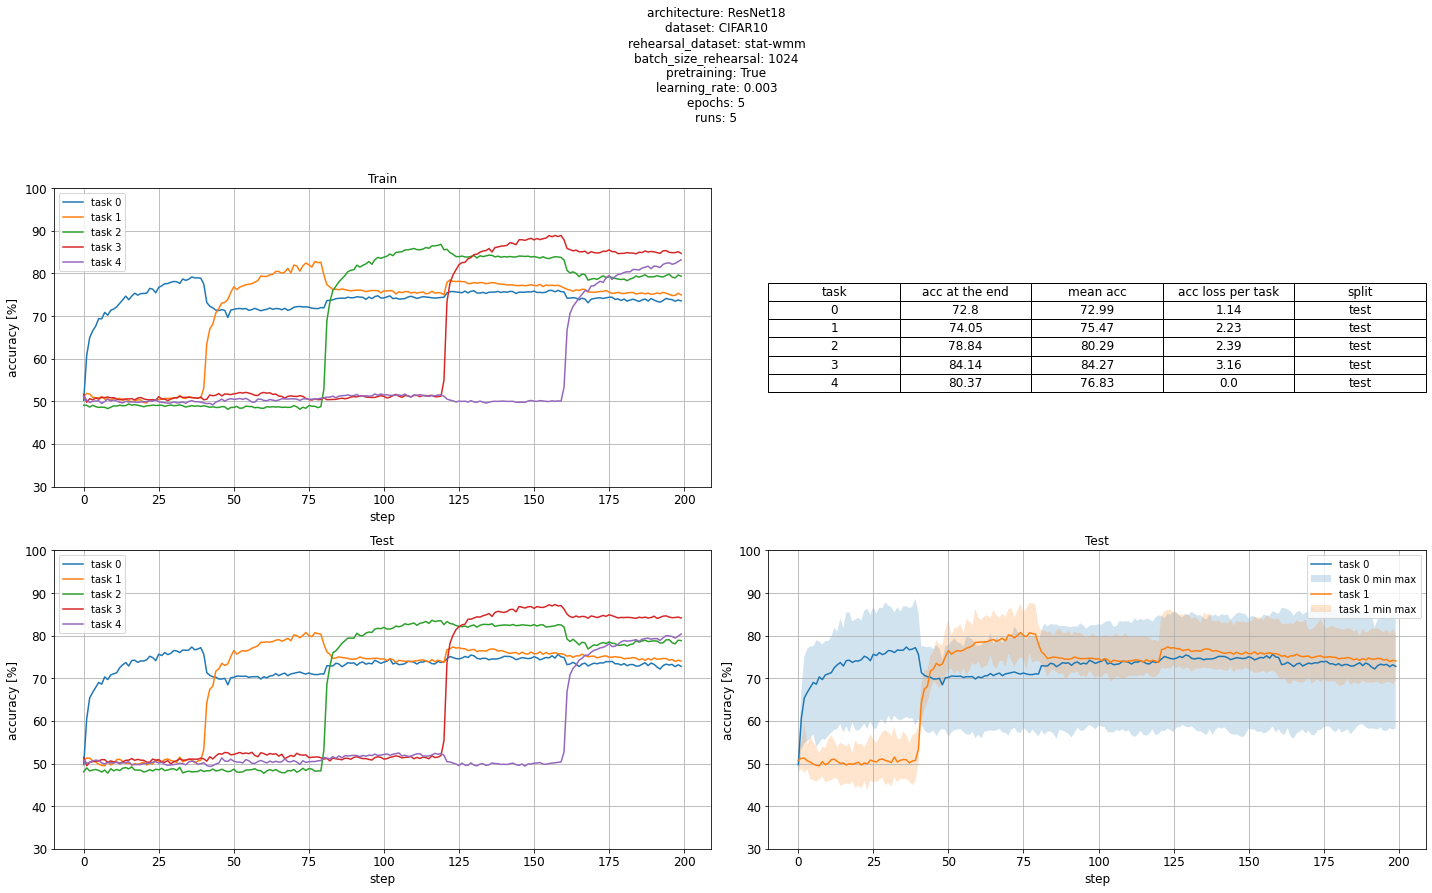

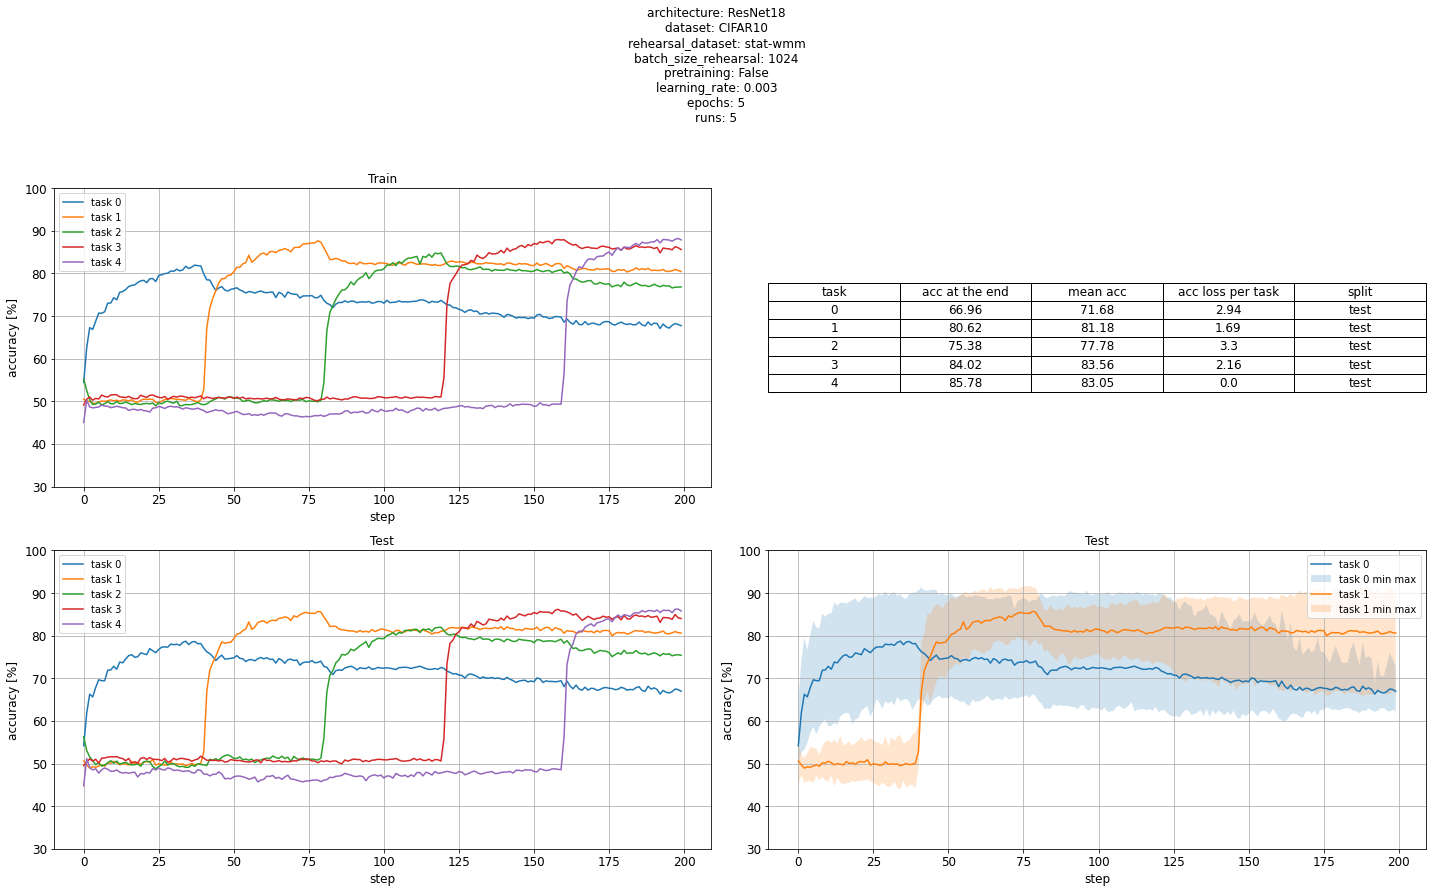

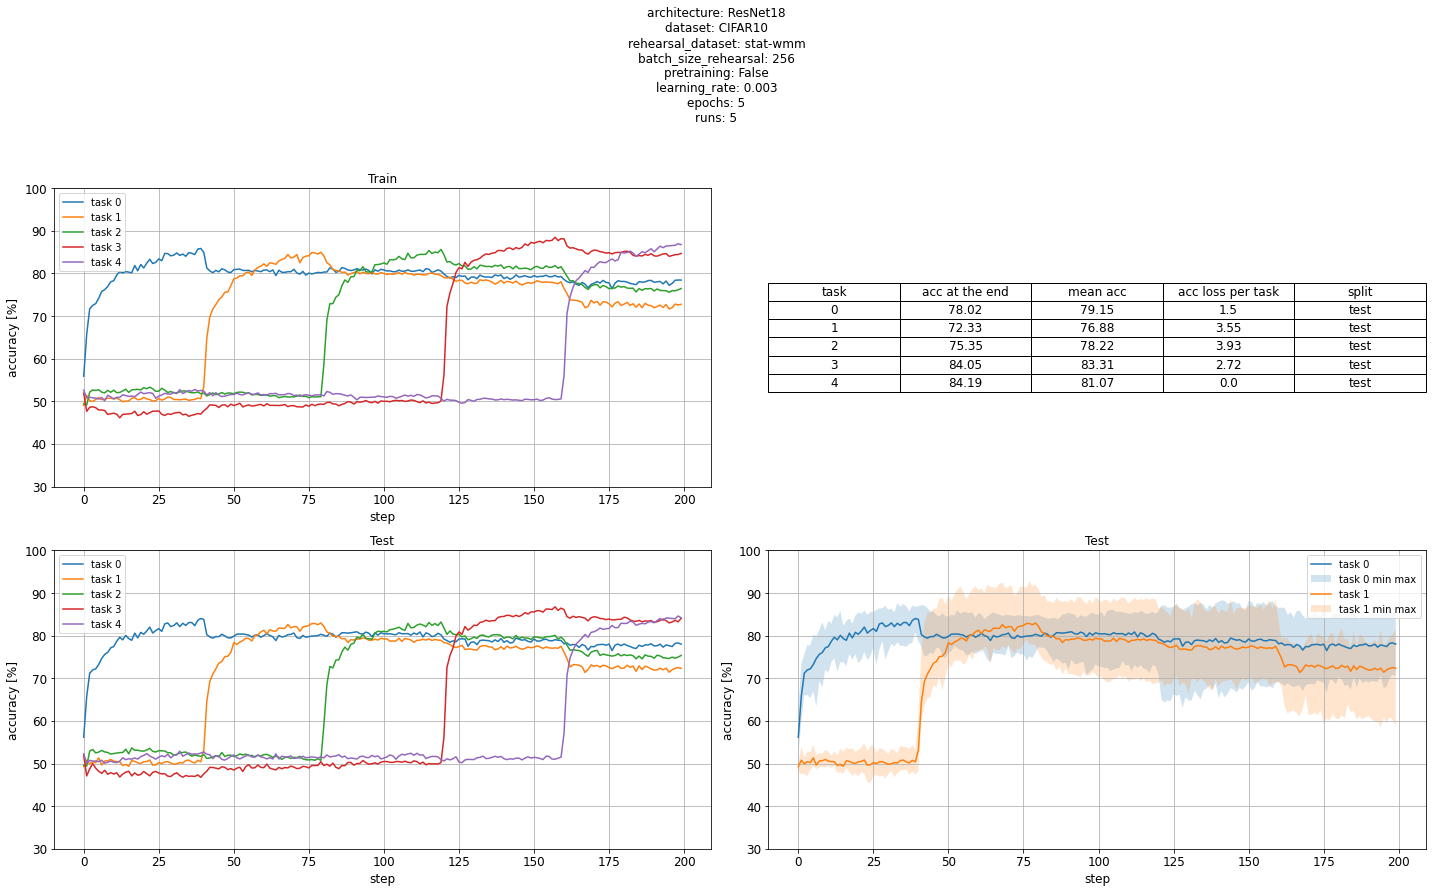

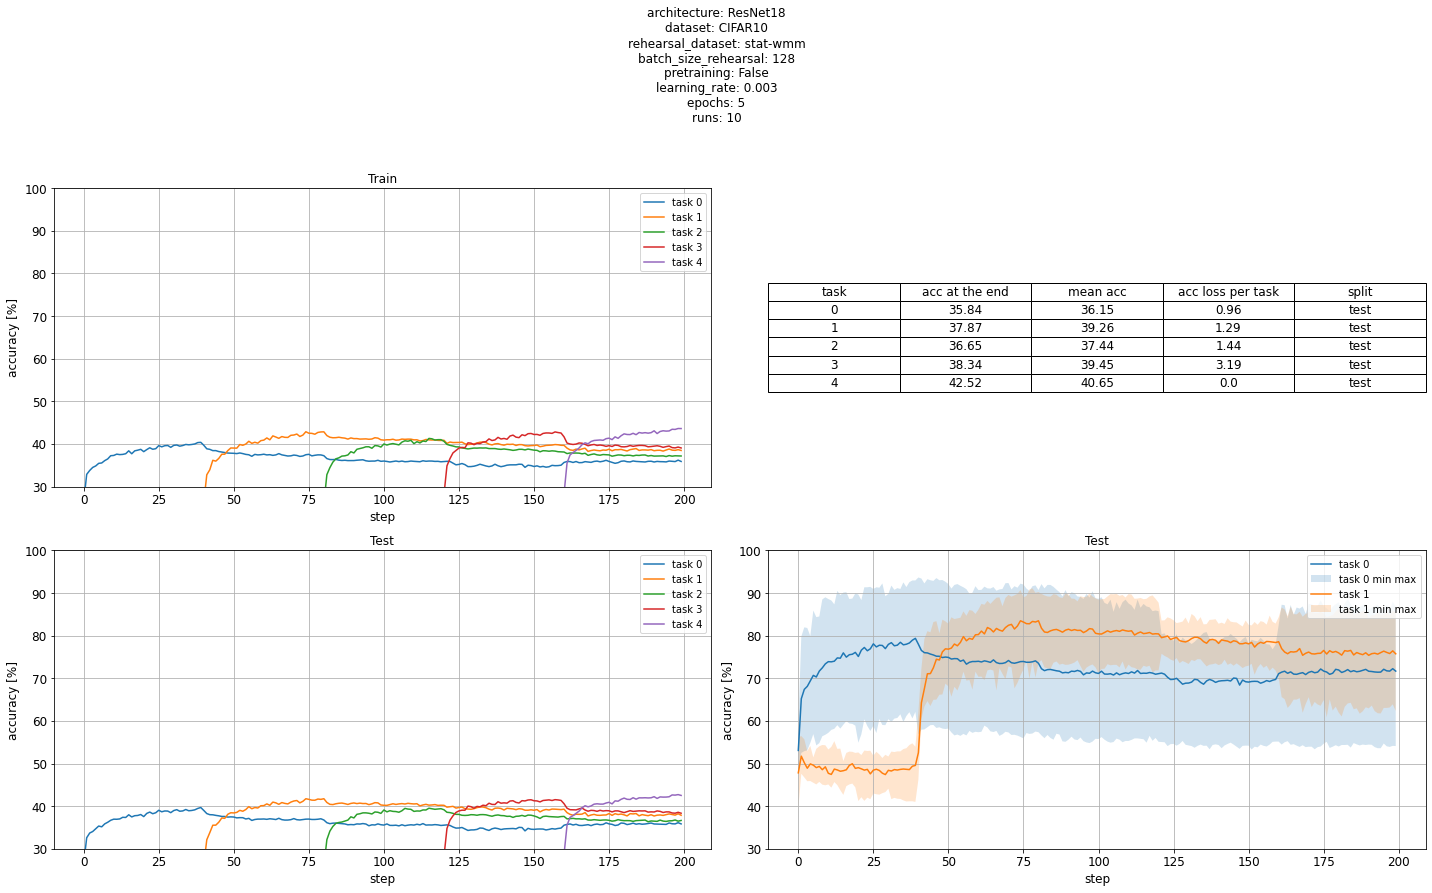

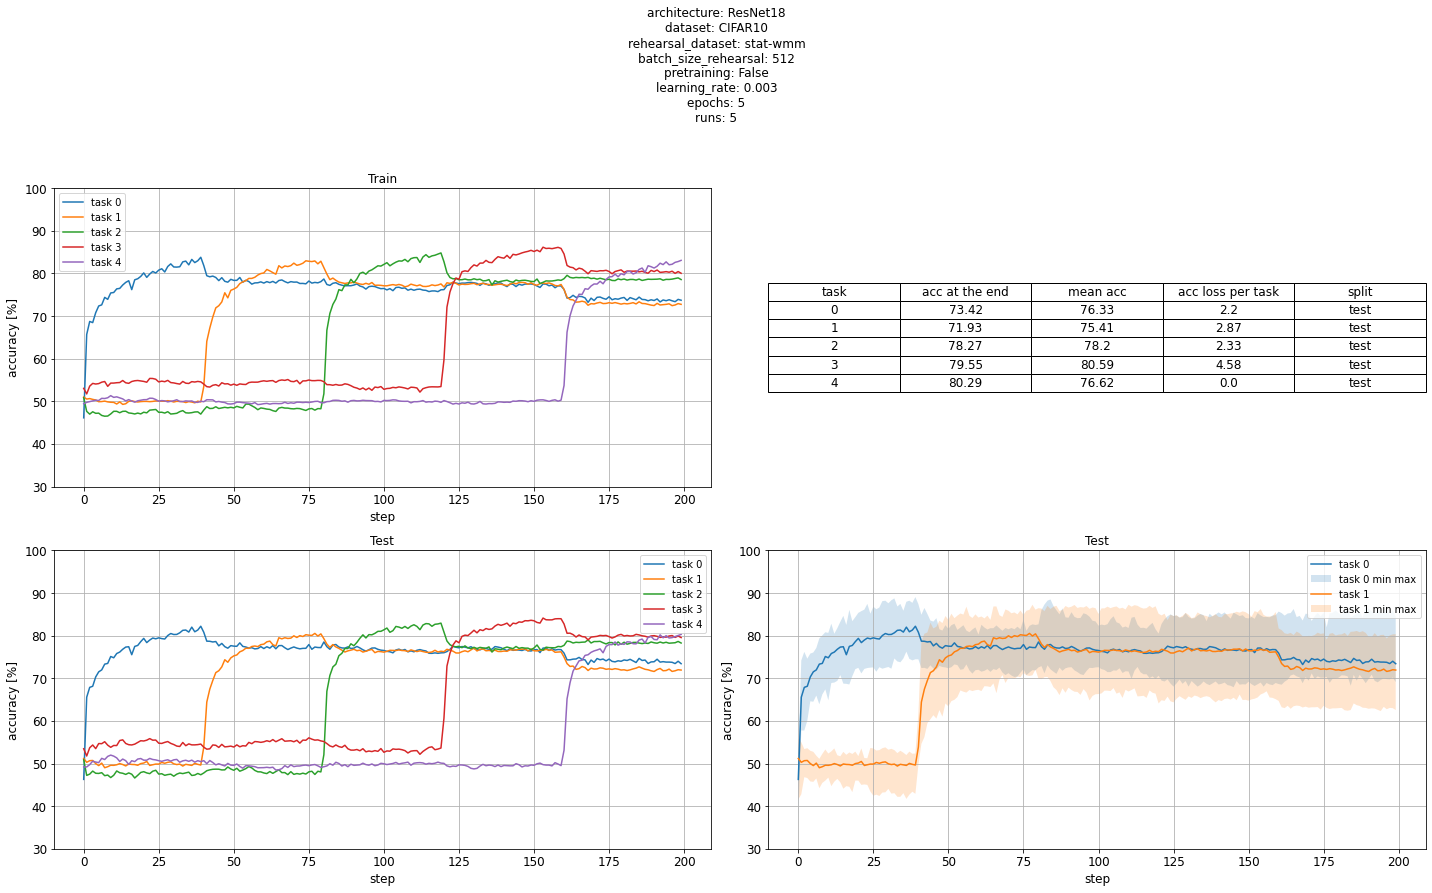

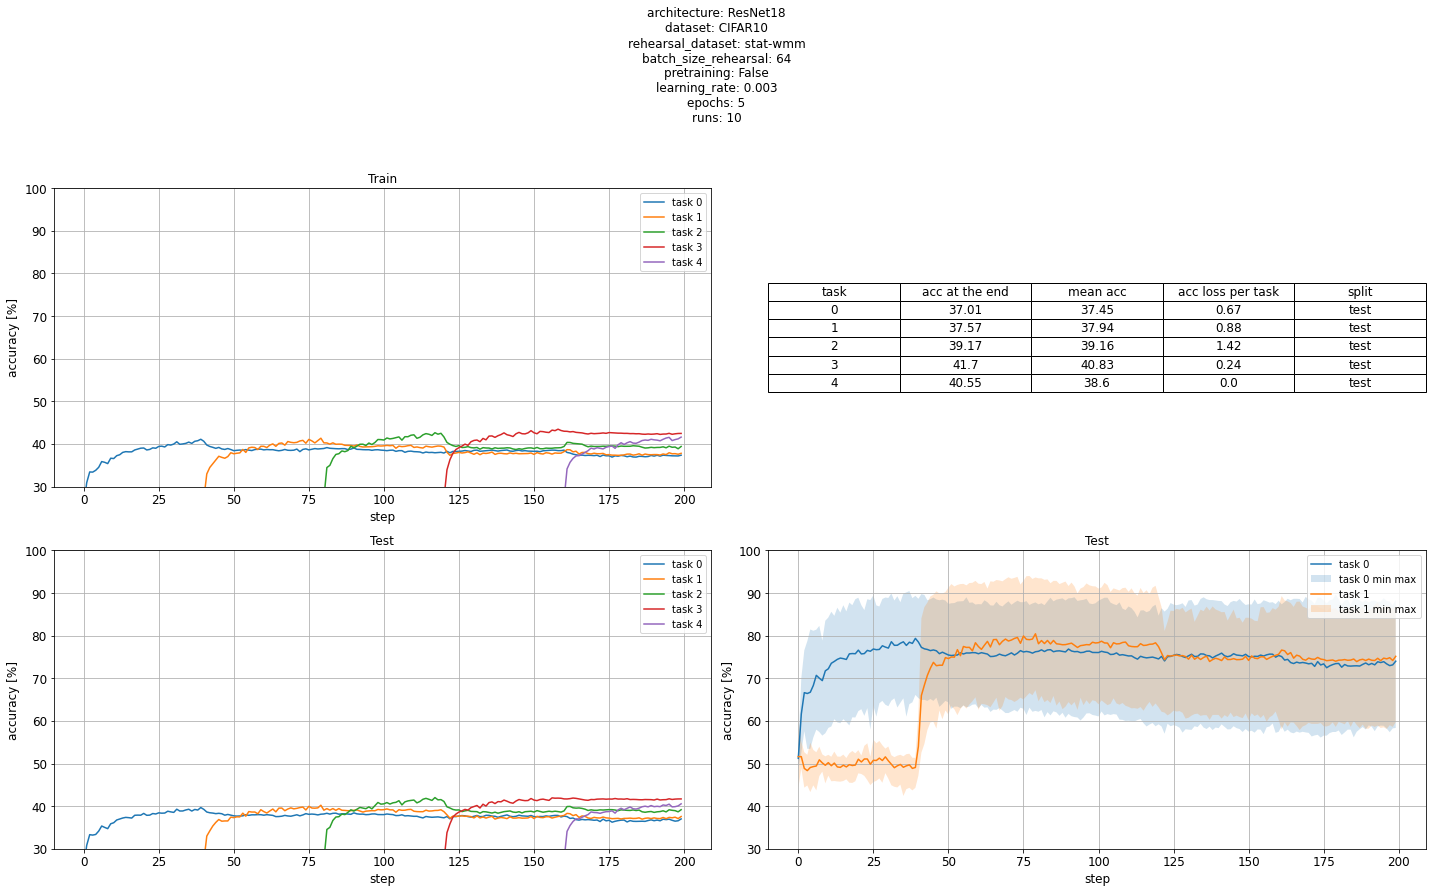

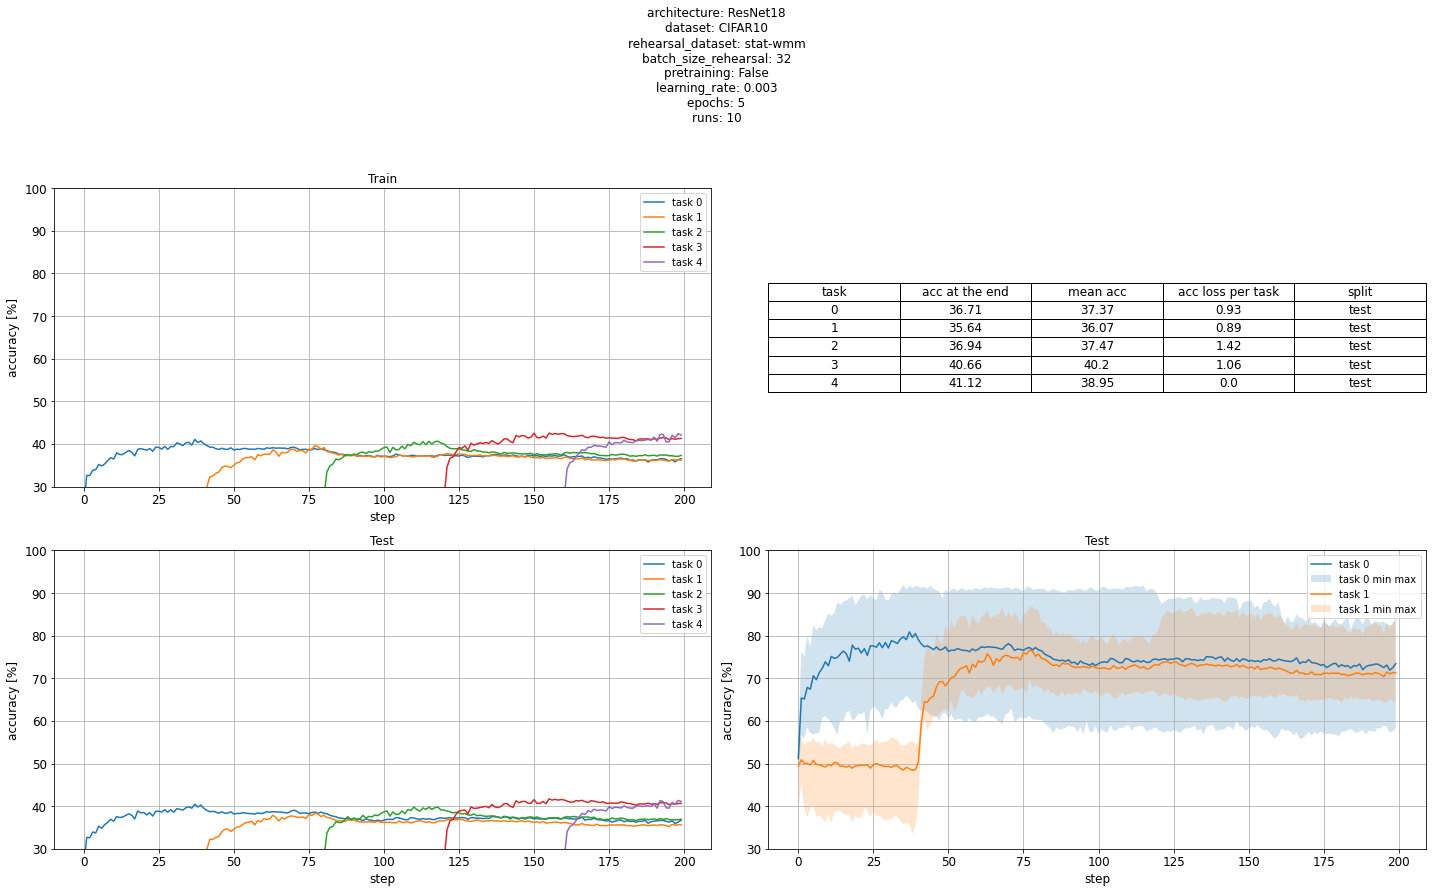

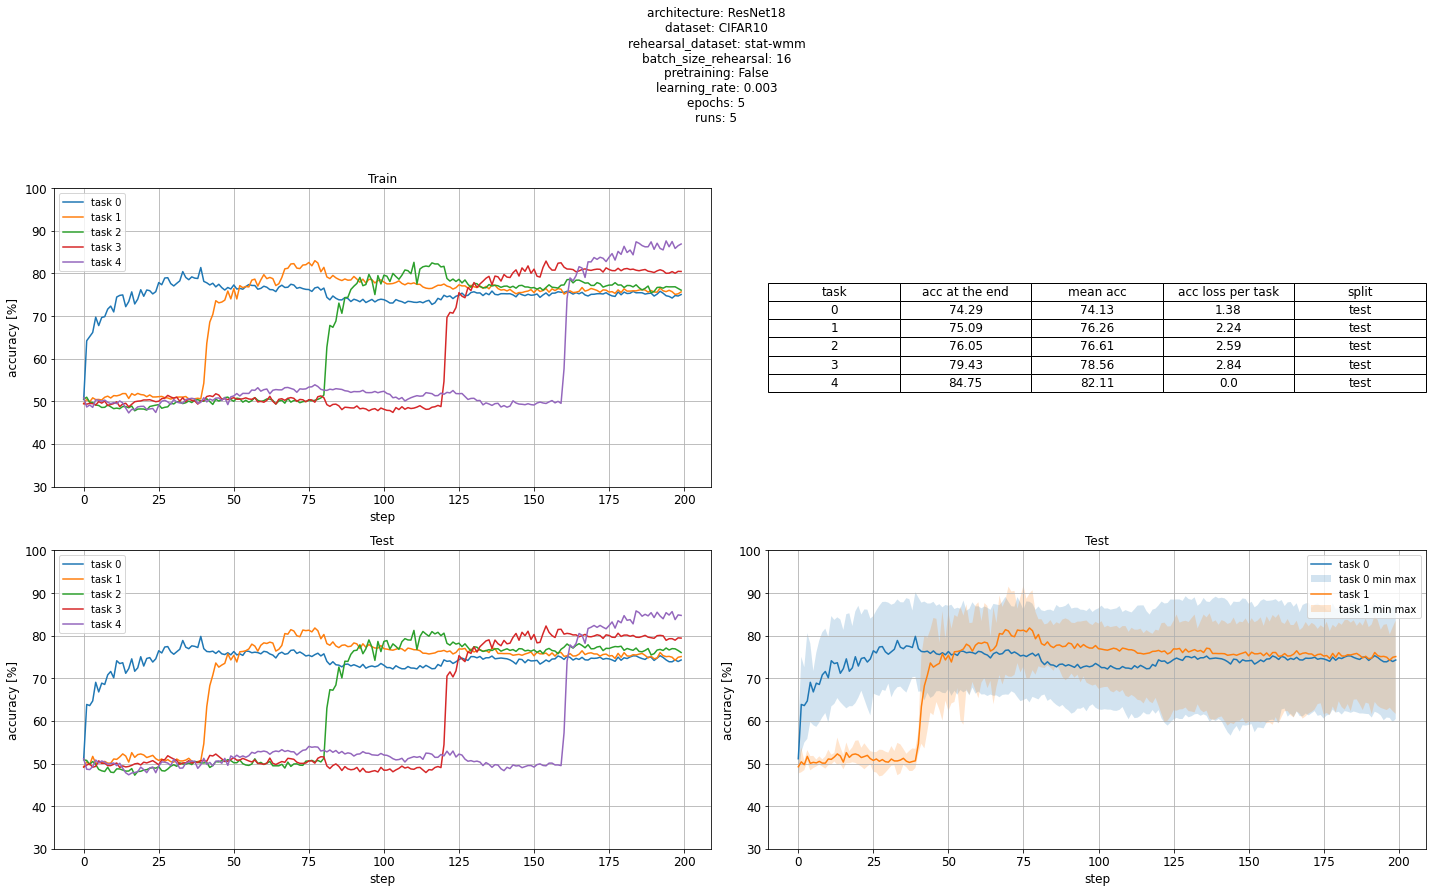

In [12]:
viz.plot_everything()